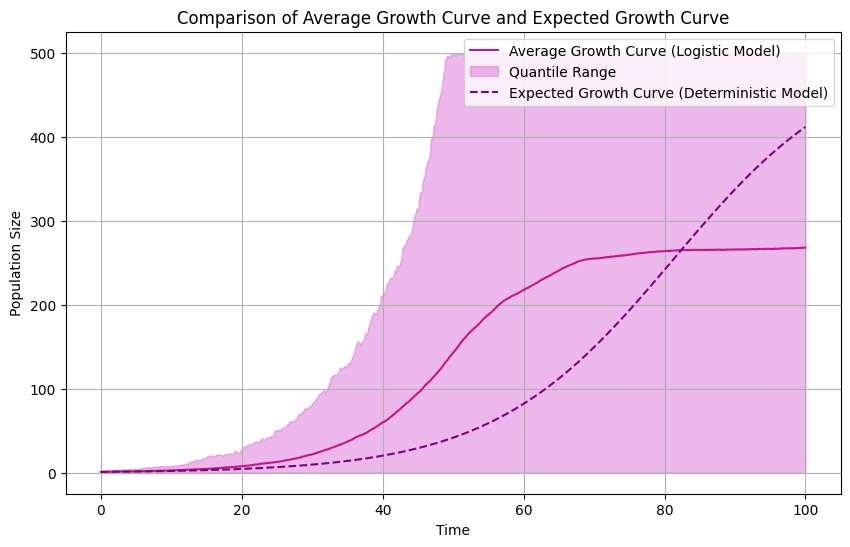

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Functions for logistic model
def set_parameters(initial_population=50, birth_rate=0.1, death_rate=0.1, carrying_capacity=500, max_time=100):
    return {
        'initial_population': initial_population,
        'birth_rate': birth_rate,
        'death_rate': death_rate,
        'carrying_capacity': carrying_capacity,
        'max_time': max_time
    }

def run_simulation(params):
    population = params['initial_population']
    birth_rate = params['birth_rate']
    death_rate = params['death_rate']
    carrying_capacity = params['carrying_capacity']
    max_time = params['max_time']
    
    time_points = [0]
    population_sizes = [population]
    
    while population > 0 and time_points[-1] < max_time:
        next_event_time = np.random.exponential(1 / (death_rate * population + birth_rate * population))
        
        if np.random.rand() < birth_rate / (birth_rate + death_rate) and population < carrying_capacity:
            population += 1
        else:
            population -= 1
        
        time_points.append(time_points[-1] + next_event_time)
        population_sizes.append(population)
    
    return time_points, population_sizes

def run_simulations(params, num_simulations=100):
    all_time_points = []
    all_population_sizes = []
    
    for _ in range(num_simulations):
        time_points, population_sizes = run_simulation(params)
        all_time_points.append(time_points)
        all_population_sizes.append(population_sizes)

    return all_time_points, all_population_sizes

def compute_average_and_quantiles(all_time_points, all_population_sizes, max_time):
    num_simulations = len(all_time_points)
    num_points = 1000
    average_time_points = np.linspace(0, max_time, num_points)
    interpolated_populations = np.zeros((num_simulations, num_points))
    
    for i in range(num_simulations):
        interpolated_populations[i] = np.interp(average_time_points, all_time_points[i], all_population_sizes[i])
    
    average_population_sizes = np.mean(interpolated_populations, axis=0)
    lower_quantile = np.quantile(interpolated_populations, 0.05, axis=0)
    upper_quantile = np.quantile(interpolated_populations, 0.95, axis=0)
    
    return average_time_points, average_population_sizes, lower_quantile, upper_quantile

# Functions for deterministic model
def logistic_growth_model(b, d, K, P0, time_steps, dt):
    r = b - d  # growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        dP = r * P * (1 - P / K) * dt
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

def generate_expected_growth_curve(b, d, K, P0, max_time, dt=1):
    time_steps = int(max_time / dt)
    population = logistic_growth_model(b, d, K, P0, time_steps, dt)
    return np.linspace(0, max_time, time_steps), population

# Parameters for both models
params = set_parameters(initial_population=1, birth_rate=0.2, death_rate=0.1, carrying_capacity=500)
num_simulations = 100
max_time = 100

# Run simulations for average growth curve for logistic model
all_time_points, all_population_sizes = run_simulations(params, num_simulations)
average_time_points, average_population_sizes, lower_quantile, upper_quantile = compute_average_and_quantiles(all_time_points, all_population_sizes, max_time)

# Parameters for deterministic model
b = 0.1
d = 0.02
K = 500
P0 = 1
dt = 1

# Generate expected growth curve for deterministic model
expected_time_points, expected_population_sizes = generate_expected_growth_curve(b, d, K, P0, max_time, dt)

# Plotting comparison
plt.figure(figsize=(10, 6))
plt.plot(average_time_points, average_population_sizes, label='Average Growth Curve (Logistic Model)', color='mediumvioletred')
plt.fill_between(average_time_points, lower_quantile, upper_quantile, color='orchid', alpha=0.5, label='Quantile Range')
plt.plot(expected_time_points, expected_population_sizes, label='Expected Growth Curve (Deterministic Model)', color='purple', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Comparison of Average Growth Curve and Expected Growth Curve')
plt.legend()
plt.grid(True)
plt.show()
